In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import mpmath

In [8]:
def ParkDrawPerpe(park, car):
    plt.plot(park["park_left"][0], park["park_left"][1], color='black', linewidth=2.0)
    plt.plot(park["park_target"][0], park["park_target"][1], color='black', linewidth=2.0)
    plt.plot(park["park_right"][0], park["park_right"][1], color='black', linewidth=2.0)
#     plt.plot(car["rectangle"][0], car["rectangle"][1], color='blue')
    # plt.axis([-7, 15, 0, 7])
    plt.pause(0.1)

In [3]:
def car_p(car_length, car_width, c_o):
    """

    :param car_length:
    :param car_width:
    :param c_o:
    :param car:
    :return:
    """
    x = c_o[0]
    y = c_o[1]
    car = dict()
    car["rectangle"] = [[x - car_lr, x - car_lr + car_length, x - car_lr + car_length, x - car_lr,
                         x - car_lr],
                        [y - car_width / 2, y - car_width / 2, y + car_width / 2,
                         y + car_width / 2, y - car_width / 2]]
    car["rear_axle"] = [[x, x], [y - car_br / 2, y + car_br / 2]]
    car["front_axle"] = [[x + car_l, x + car_l], [y - car_br / 2, y + car_br / 2]]
    car["connect"] = [[x, x + car_l], [y, y]]

    return car

In [4]:
def RotTheta(car, theta, c_o):
    """
    线条绕着某点旋转到一定角度，计算旋转完成后线条的坐标
    :param car:待旋转的线条
    :param theta: 绕旋转中心点转到的角度
    :param x: 旋转中心的横坐标
    :param y: 旋转中心的纵坐标
    :return: 旋转完成之后线条
    """
    x = c_o[0]
    y = c_o[1]
    new_car = dict()
    new_car["rectangle"] = [[], []]
    new_car["rear_axle"] = [[], []]
    new_car["front_axle"] = [[], []]
    new_car["connect"] = [[], []]
    for i in car:
        for j in range(len(car[i][0])):
            x_final = (car[i][0][j] - x) * np.cos(theta) - (car[i][1][j] - y) * np.sin(theta) + x
            y_final = (car[i][0][j] - x) * np.sin(theta) + (car[i][1][j] - y) * np.cos(theta) + y
            new_car[i][0].append(x_final)
            new_car[i][1].append(y_final)
    return new_car

In [5]:
park = dict()
park_length = 6.5
park_width = 2.5
park["park_left"] = [[-park_width / 2, -park_width / 2, -park_width * 1.5, -park_width * 1.5, -park_width / 2],
                     [0, -park_length, -park_length, 0, 0]]
park["park_target"] = [[park_width / 2, park_width / 2, -park_width / 2, -park_width / 2, park_width / 2],
                       [0, -park_length, -park_length, 0, 0]]
park["park_right"] = [[park_width * 1.5, 1.5 * park_width, park_width / 2, park_width / 2, park_width * 1.5],
                      [0, -park_length, -park_length, 0, 0]]

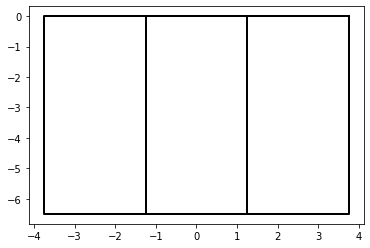

In [9]:
ParkDrawPerpe(park,car={})

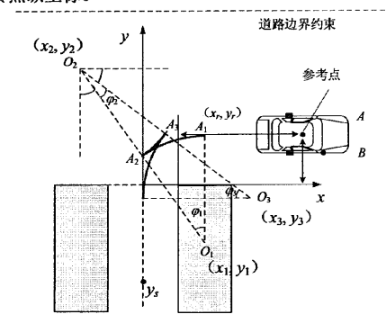

In [ ]:
## 根据最小转弯半径确定圆弧1的圆心
circle1 = np.array([x_start, y_start - r_min])
circle3 = np.array([x_end + r_min, y_end])

theta1 = Symbol("theta1")
theta3 = Symbol("theta3")
result = solve([cos(theta3) - sin(theta1) - 0.25, cos(theta1) - sin(theta3) - 0.125], [theta1, theta3])

for res in result:
    print(res)
    if (res[0] < np.pi / 2) and (res[0] > 0) and (res[1] < np.pi / 2) and (res[1] > 0):
        theta1 = float(res[0])
        theta3 = float(res[1])

Circle2 = np.array([circle3[0] - 2 * r_min * cos(theta3), circle3[1] + 2 * r_min * sin(theta3)])
theta2 = float(np.pi / 2 - theta1 - theta3)

num = 15
# print(type(theta1))
# print(type(theta2))
# print(type(0.323434385700017))
alpha_arr = np.linspace(0, float(theta1), num)
print(alpha_arr)
circle1_data = np.array(
    [x_start - r_min * np.sin(alpha_arr), y_start - r_min + r_min * np.cos(alpha_arr), alpha_arr])
alpha_arr = np.linspace(theta1, np.pi / 2 - theta3, num)
circle2_data = np.array([Circle2[0] + r_min * np.sin(alpha_arr), Circle2[1] - r_min * np.cos(alpha_arr), alpha_arr])
alpha_arr = np.linspace(theta3, 0, num)
circle3_data = np.array(
    [circle3[0] - r_min * np.cos(alpha_arr), circle3[1] + r_min * np.sin(alpha_arr), np.pi / 2 - alpha_arr])
adjust_data = np.array([[x_end] * num, np.linspace(y_end, y_end - 4, num), [np.pi / 2] * num])[::-1]

data_traj = np.concatenate((circle1_data, circle2_data, circle3_data, adjust_data), axis=1)
